In [1]:
from virusPropagationModel import *
%matplotlib inline
import glob
import os
import matplotlib.pyplot as plt
import pandas

In [2]:
geopath = 'datafiles/'
geofiles = {0:'Buildings_Bad_Feilnbach_MA_0_5.csv',
            1:'Buildings_Bad_Feilnbach_MA_1.csv',
            2:'Buildings_Bad_Feilnbach_MA_3.csv'}

In [4]:
modeledWorld1 = ModeledPopulatedWorld(1000,5, world_from_file=True, geofile_name=geopath+geofiles[2], agent_agent_infection=True, input_schedules='schedules_v1')
print('Number of agents: '+ str(modeledWorld1.number_of_people))
print('Distribution of initialized locations: ' + str(modeledWorld1.get_distribution_of_location_types()))

Number of agents: 1501
Distribution of initialized locations: {'hospital': 1, 'morgue': 1, 'work': 24, 'public': 18, 'school': 3, 'home': 713}


In [43]:
modeledWorld1.save('Bad_Feilnbach',date_suffix=False)

Text(0, 0.5, 'Number of Locations')

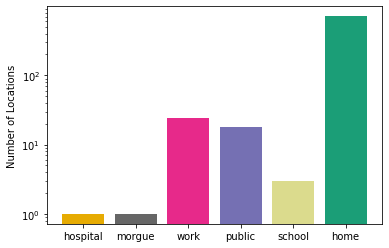

In [5]:
modeledWorld1.plot_distribution_of_location_types()
ax = plt.gca()
ax.set_yscale('log')
ax.set_ylabel('Number of Locations')

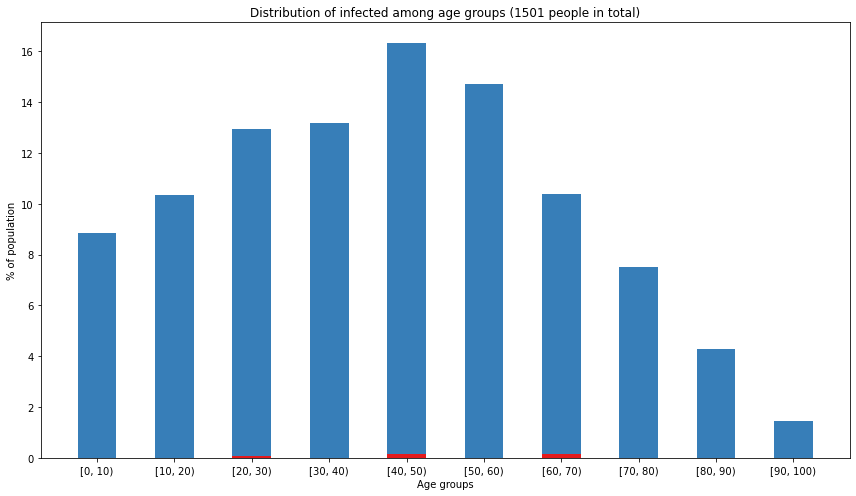

In [6]:
modeledWorld1.plot_initial_distribution_of_ages_and_infected(age_groups_step=10)

In [13]:
simulation1 = Simulation(modeledWorld1,1500,run_immediately=False)
simulation1.change_agent_attributes({'all':{'behaviour_as_infected':{'value':0.3,'type':'replacement'}}})
simulation1.interaction_frequency=2

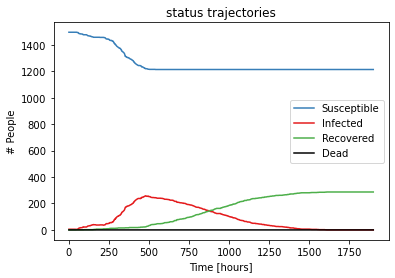

In [19]:
simulation1 = Simulation(modeledWorld1,100,run_immediately=False)
simulation1.interaction_frequency=2
simulation1.simulate()

for p in list(simulation1.people):
    p.stay_home_instead_of_going_to('work')
    p.stay_home_instead_of_going_to('school')
    p.stay_home_instead_of_going_to('public')

simulation1.time_steps=800
simulation1.simulate()

for p in list(simulation1.people):
    p.reset_schedule()

simulation1.time_steps=1000
simulation1.simulate()
simulation1.plot_status_timecourse()

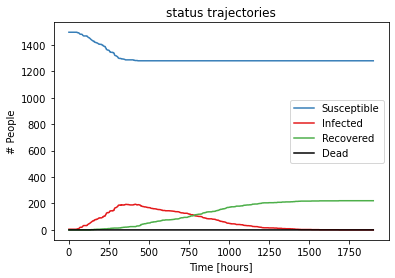

In [20]:
simulation1 = Simulation(modeledWorld1,100,run_immediately=False)
simulation1.interaction_matrix=False
simulation1.simulate()

for p in list(simulation1.people):
    p.stay_home_instead_of_going_to('work')
    p.stay_home_instead_of_going_to('school')
    p.stay_home_instead_of_going_to('public')

simulation1.time_steps=800
simulation1.simulate()

for p in list(simulation1.people):
    p.reset_schedule()

simulation1.time_steps=1000
simulation1.simulate()
simulation1.plot_status_timecourse()

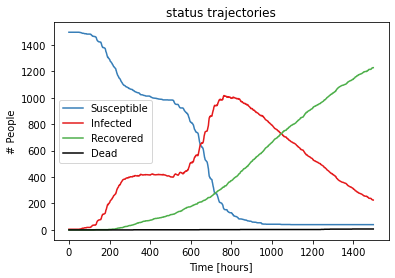

In [16]:
simulation1.plot_status_timecourse()

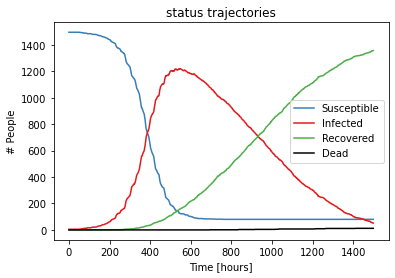

In [14]:
simulation1.simulate()
simulation1.plot_status_timecourse()

In [9]:
simulation2 = Simulation(modeledWorld1,1500,run_immediately=False)
simulation2.change_agent_attributes({'all':{'behaviour_as_infected':{'value':0.3,'type':'replacement'}}})
simulation2.interaction_matrix=False

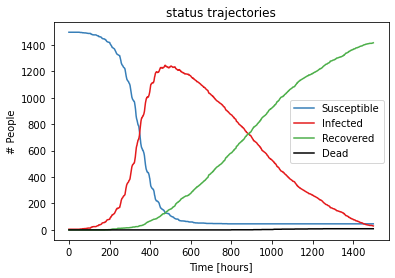

In [10]:
simulation2.simulate()
simulation2.plot_status_timecourse()

In [44]:
simulation1.save('Bad_Feilnbach_SIM', date_suffix=False )

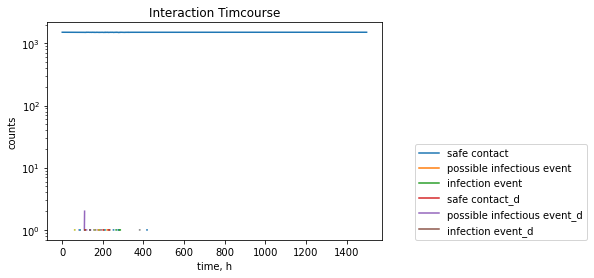

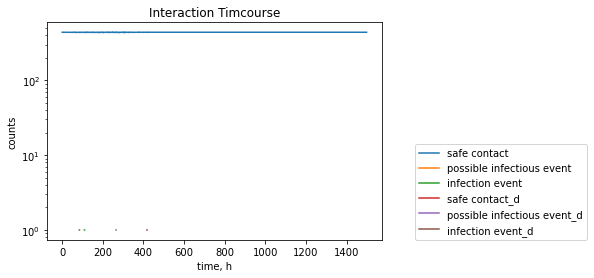

In [25]:
simulation1.plot_interaction_timecourse(save_figure=False, log=True, diagnosed_contact=False)
simulation1.plot_interaction_timecourse(save_figure=False, log=True, diagnosed_contact=True)

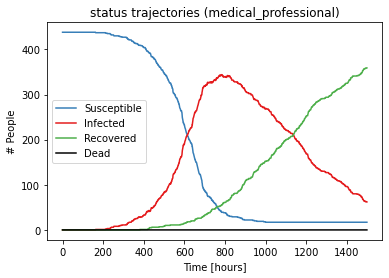

In [31]:
simulation1.plot_status_timecourse(specific_people='medical_professional')

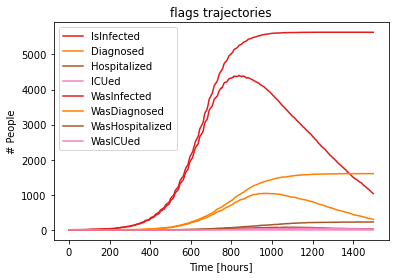

In [32]:
simulation1.plot_flags_timecourse()

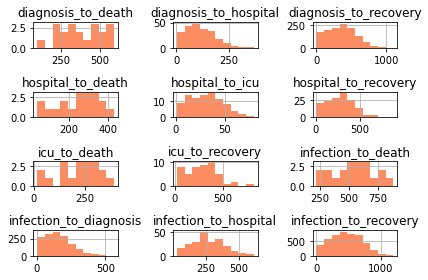

In [33]:
simulation1.plot_distributions_of_durations()

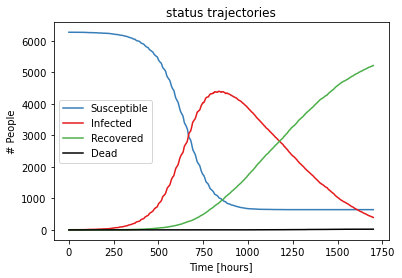

In [35]:
simulation2 = Simulation(simulation1,200) # Now Simulation class objects can be used for subsequent simulation (nested)
simulation2.plot_status_timecourse()

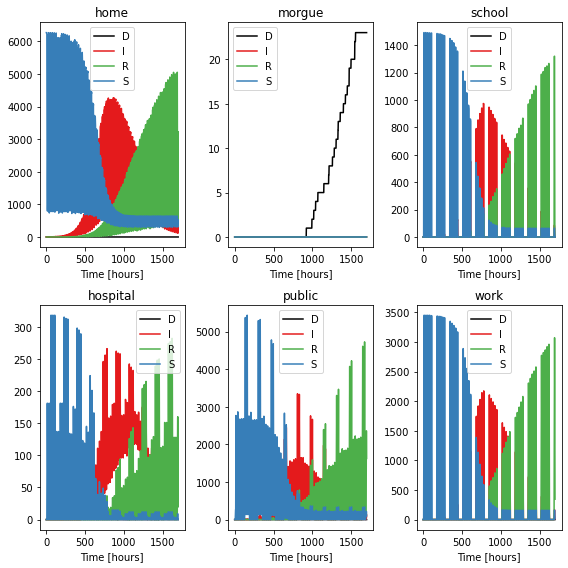

In [36]:
simulation2.plot_status_at_location()

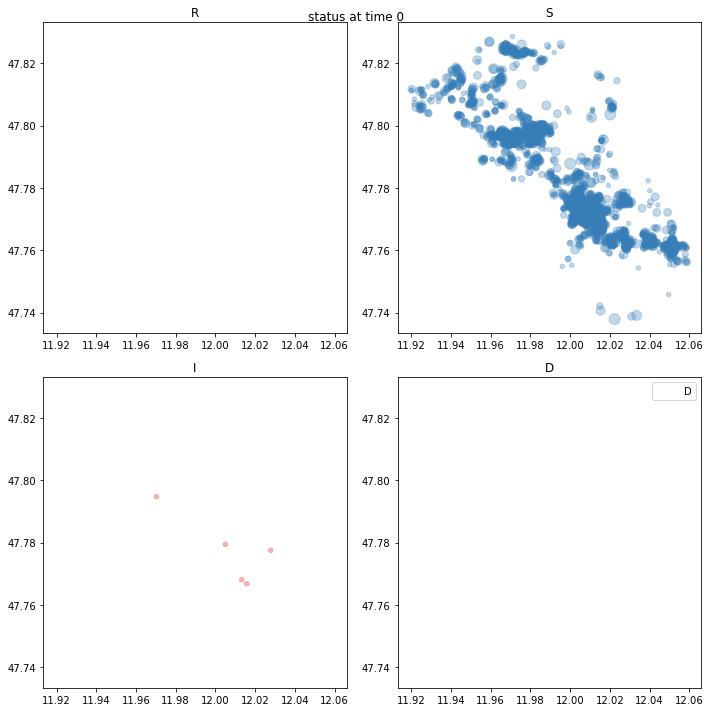

In [37]:
simulation1.map_status_at_loc(save_figure=False,time_steps=1)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


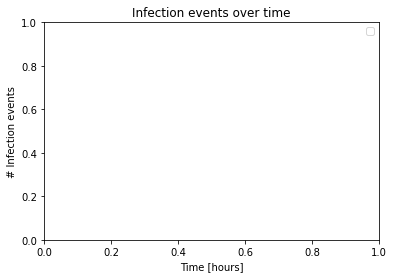

In [17]:
simulation1.plot_infections_per_location_type_over_time()

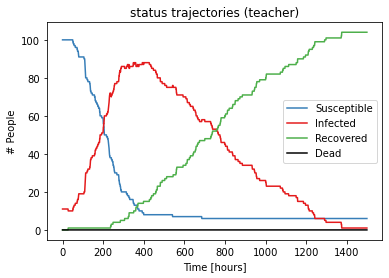

In [18]:
simulation1.plot_status_timecourse(specific_people='teacher')

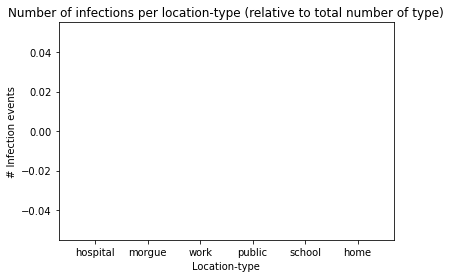

In [19]:
simulation1.plot_infections_per_location_type()

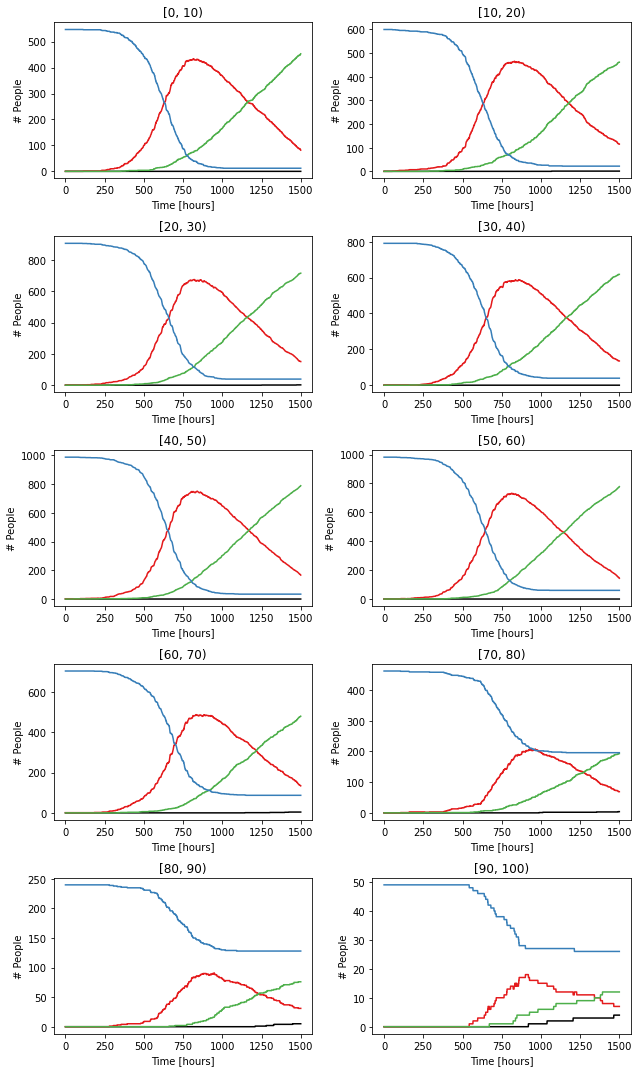

In [38]:
simulation1.plot_age_groups_status_timecourse()